# TV Series EDA and Recommender System

### Importing Required Packages & Importing Dataset

In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
#import required dataset into pandas dataframe
data = pd.read_csv('E:\Datasets\series_data.csv')

### Exploratory Data Analysis

**Understand the Data**

In [3]:
#printing dataset observations
data.head()

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966


In [4]:
#print columns present in the dataset
data.columns

Index(['Poster_Link', 'Series_Title', 'Runtime_of_Series', 'Certificate',
       'Runtime_of_Episodes', 'Genre', 'IMDB_Rating', 'Overview', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes'],
      dtype='object')

In [5]:
#print datatype of data present in columns of dataset
data.dtypes

Poster_Link             object
Series_Title            object
Runtime_of_Series       object
Certificate             object
Runtime_of_Episodes     object
Genre                   object
IMDB_Rating            float64
Overview                object
Star1                   object
Star2                   object
Star3                   object
Star4                   object
No_of_Votes              int64
dtype: object

In [6]:
#printing dataset shape
data.shape

(2000, 13)

In [7]:
#obtaining descriptive information about the dataset
data.describe()

,IMDB_Rating,No_of_Votes
count,2000.000000,2.000000e+03
mean,7.591300,3.770391e+04
std,0.898731,8.843231e+04
min,1.000000,5.109000e+03
25%,7.200000,7.745500e+03
50%,7.700000,1.316100e+04
75%,8.200000,3.132200e+04
max,9.700000,1.773458e+06


In [8]:
#obtaining the information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poster_Link          2000 non-null   object 
 1   Series_Title         2000 non-null   object 
 2   Runtime_of_Series    2000 non-null   object 
 3   Certificate          703 non-null    object 
 4   Runtime_of_Episodes  1957 non-null   object 
 5   Genre                2000 non-null   object 
 6   IMDB_Rating          2000 non-null   float64
 7   Overview             2000 non-null   object 
 8   Star1                2000 non-null   object 
 9   Star2                2000 non-null   object 
 10  Star3                1999 non-null   object 
 11  Star4                1995 non-null   object 
 12  No_of_Votes          2000 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [9]:
#obtain information on unique values in each column
data.nunique()

Poster_Link            2000
Series_Title           1956
Runtime_of_Series       514
Certificate              18
Runtime_of_Episodes     108
Genre                   267
IMDB_Rating              65
Overview               2000
Star1                  1702
Star2                  1852
Star3                  1872
Star4                  1899
No_of_Votes            1926
dtype: int64

**Cleaning the Data**

In [10]:
data.drop(['Poster_Link'], axis=1, inplace=True)
data.head(10)

,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698
3,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816
4,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966
5,Sherlock,(2010–2017),UA,88 min,"Crime, Drama, Mystery",9.1,A modern update finds the famous sleuth and hi...,Benedict Cumberbatch,Martin Freeman,Una Stubbs,Rupert Graves,808717
6,The Big Bang Theory,(2007–2019),U,22 min,"Comedy, Romance",8.1,A woman who moves into an apartment across the...,Johnny Galecki,Jim Parsons,Kaley Cuoco,Simon Helberg,724187
7,Dexter,(2006–2021),A,53 min,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...",Michael C. Hall,Jennifer Carpenter,David Zayas,James Remar,647136
8,How I Met Your Mother,(2005–2014),15+,22 min,"Comedy, Romance",8.3,A father recounts to his children - through a ...,Josh Radnor,Jason Segel,Cobie Smulders,Neil Patrick Harris,603824
9,True Detective,(2014– ),A,55 min,"Crime, Drama, Mystery",9.0,Seasonal anthology series in which police inve...,Vince Vaughn,Colin Farrell,Rachel McAdams,Taylor Kitsch,500194


**Relationship Analysis**

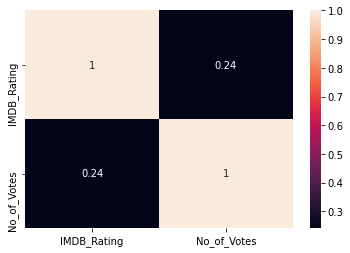

In [11]:
#obtain pairwise corelation
corelation = data.corr()
#display pairwise corelation using heatmap
sns.heatmap(corelation, annot=True)

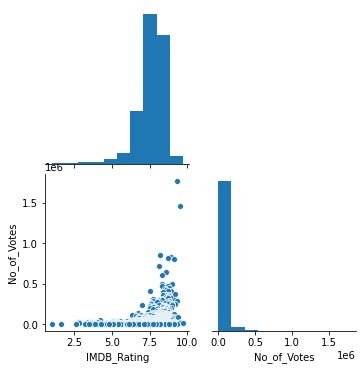

In [12]:
#present pairwise bivariate distribution in dataset
sns.pairplot(data, corner=True)

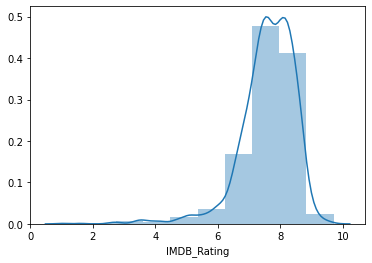

In [13]:
#plot for IMDB ratings
sns.distplot(data['IMDB_Rating'], bins=10)

In [14]:
#sort the rows according to no. of votes and IMDB ratings in descending order
ratings=data.sort_values(['No_of_Votes'],ascending=False)
imdb=data.sort_values(['IMDB_Rating'],ascending=False)

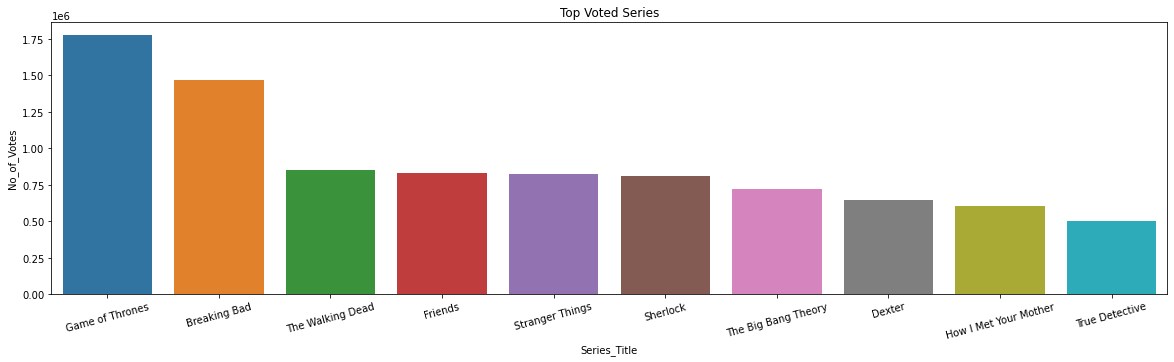

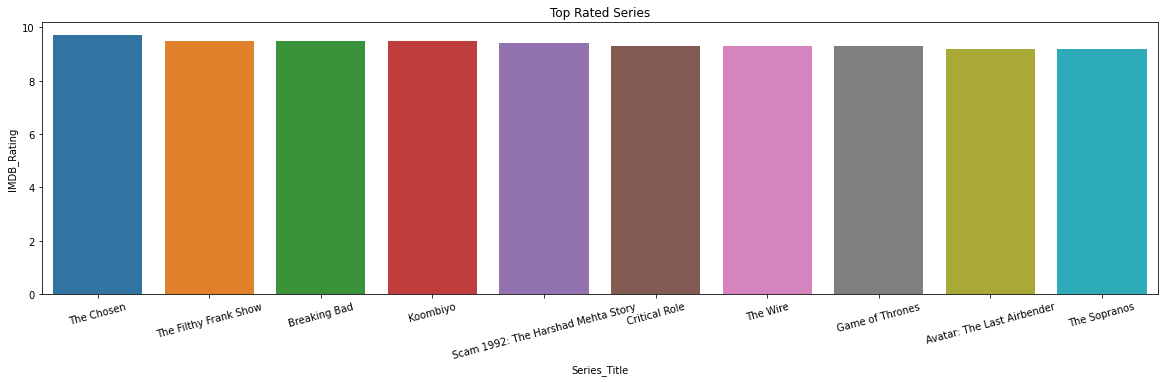

In [15]:
#plot for top 10 voted series
fig,axs=plt.subplots(figsize=(20,5))
g1=sns.barplot(x=ratings['Series_Title'][:10],y=ratings['No_of_Votes'][:10])
g1.set_title("Top Voted Series")
g1.tick_params(axis='x', labelrotation=15)

#plot for top 10 rated series
fig,axs=plt.subplots(figsize=(20,5))
g2=sns.barplot(x=imdb['Series_Title'][:10],y=imdb['IMDB_Rating'][:10])
g2.set_title("Top Rated Series")
g2.tick_params(axis='x', labelrotation=15)

plt.show()

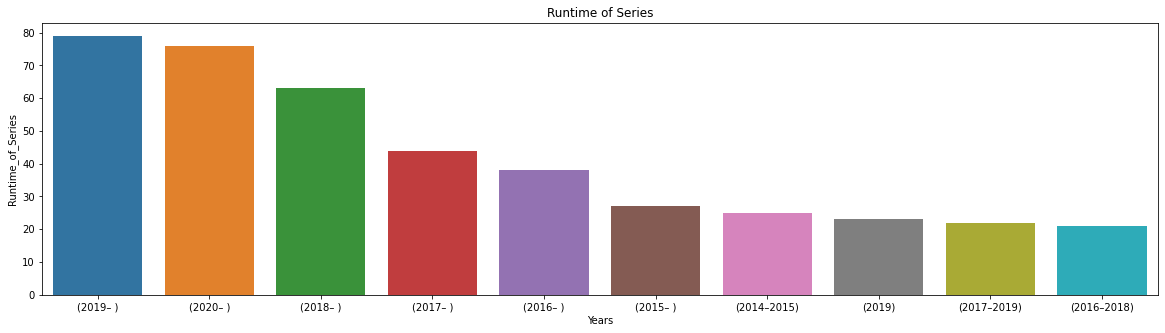

In [16]:
#plot for runtime of series
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Runtime_of_Series'].value_counts()[:10].index,y=data['Runtime_of_Series'].value_counts()[:10])
g.set_title("Runtime of Series")
g.set_xlabel("Years")
plt.show()

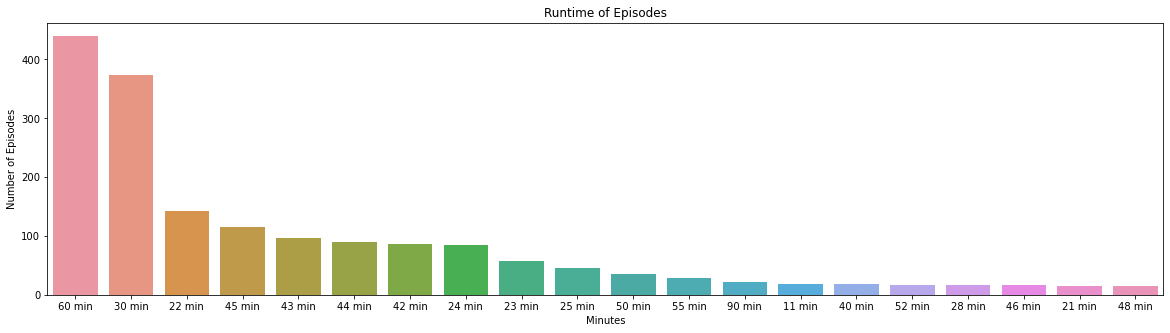

In [17]:
#plot for number Runtime of Episodes
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Runtime_of_Episodes'].value_counts()[:20].index,y=data['Runtime_of_Episodes'].value_counts()[:20])
g.set_title("Runtime of Episodes")
g.set_xlabel("Minutes")
g.set_ylabel("Number of Episodes")
plt.show()

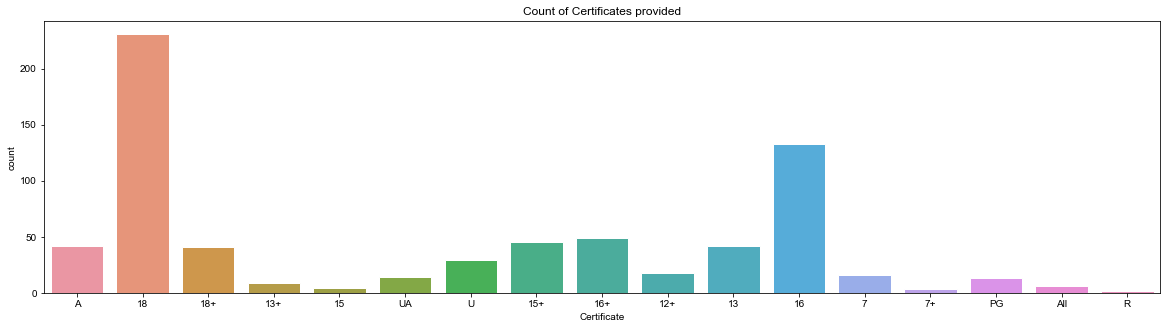

In [18]:
#renaming Nan values in certificate column to 'Not Rated'
data['Certificate']=data['Certificate'].fillna('Not Rated')

#visualizing all the certificates except 'Not Rated' category
certi = data[data['Certificate']!='Not Rated']['Certificate']

#plot for count of certificates provided
fig,axs=plt.subplots(figsize=(20,5))
sns.set_style('darkgrid')
g=sns.countplot(certi)
g.set_title("Count of Certificates provided")
plt.show()

In [19]:
#obtain duration for the series in years
duration=[]
for x in data["Runtime_of_Series"]:
    p=re.compile('\d+')
    j=p.findall(x)
    if len(j)==2:
        duration.append(int(j[1])-int(j[0])+1)
    else:
        duration.append(2021-int(j[0])+1)
data['duration']=duration

In [20]:
#view minimum and maximum value of duration
print("Maximum Duration : ",max(data['duration']))
print("Minimum Duration : ",min(data['duration']))
#view dataset with column duration
data.head()

Maximum Duration :  65
Minimum Duration :  1


,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes,duration
0,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458,9
1,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887,6
2,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698,12
3,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816,11
4,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966,6


Text(0.5, 1.0, 'Duration of series')

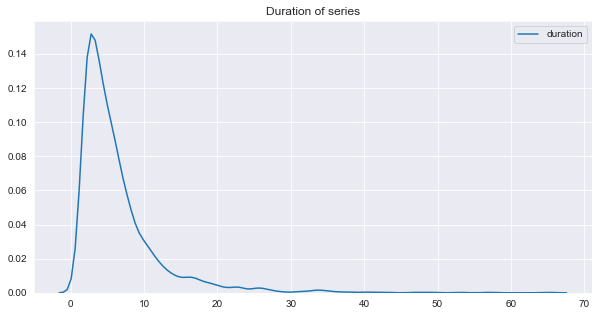

In [21]:
#plot for duration of series
fig,axs=plt.subplots(figsize=(10,5))
g=sns.kdeplot(data['duration'])
g.set_title("Duration of series")

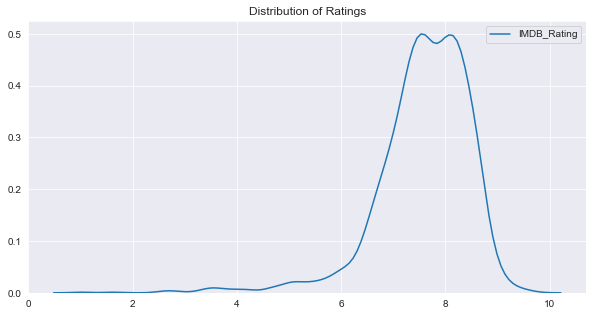

In [22]:
#plot for distribution of ratings
fig,axs=plt.subplots(figsize=(10,5))
g=sns.kdeplot(data['IMDB_Rating'])
g.set_title("Distribution of Ratings")
plt.show()

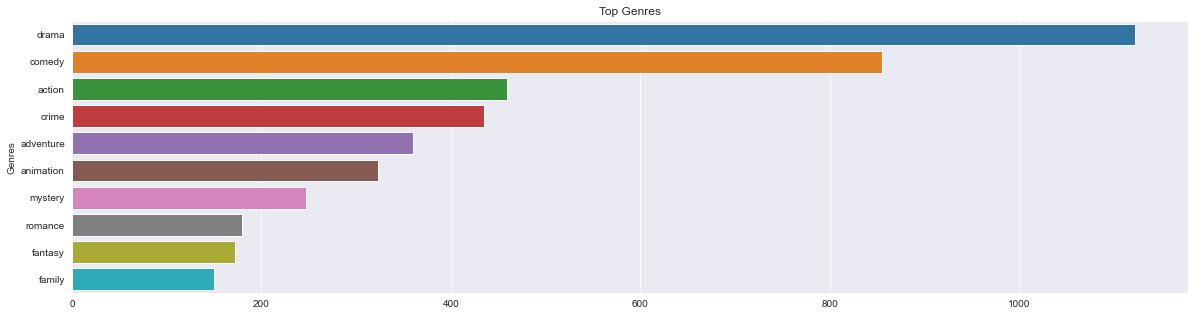

In [23]:
#create a list of all the genres
genre=[]
for x in data['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())
        
#find the count of these genres
count=Counter(genre)
count=count.most_common()[:10]
x,y=map(list,zip(*count))

#visualize the plot for top 10 genres present for tv series
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(y,x)
g.set_ylabel("Genres")
g.set_title("Top Genres")
plt.show()

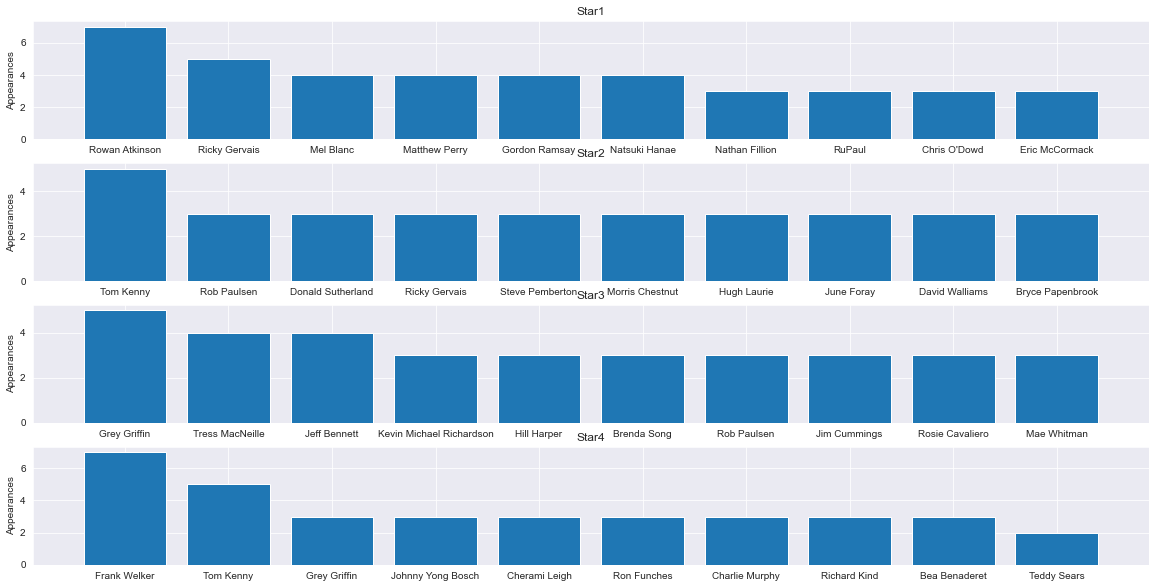

In [24]:
stars=['Star1','Star2','Star3','Star4']

#subplot for 4 rows and 1 column
fig,axs=plt.subplots(4,1,figsize=(20,10))

#visualize 4 bar graphs for appearances of stars in tv series
ax=0
for x in stars:
    #plot for appearances of stars in the tv series
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances")
    ax+=1

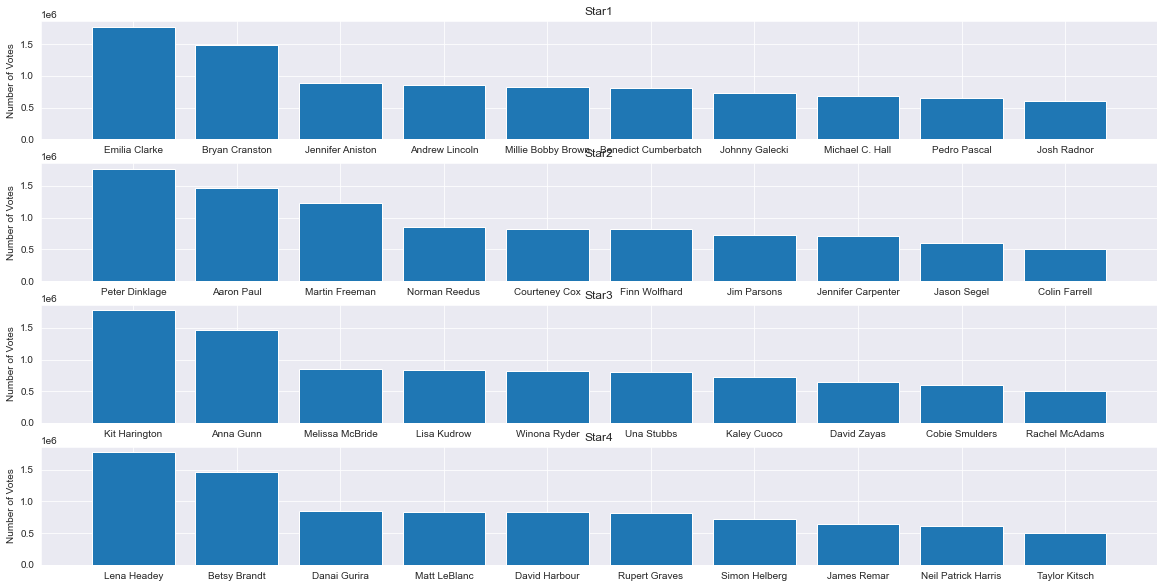

In [25]:
stars=['Star1','Star2','Star3','Star4']

#subplot for 4 rows and 1 column
fig,axs=plt.subplots(4,1,figsize=(20,10))

#visualize 4 bar graphs for appearances of stars in tv series
ax=0
for x in stars:
    #plot for highest number of votes for stars in that tv series
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['No_of_Votes'],ascending=False)[:10]
    axs[ax].bar(d[x],d['No_of_Votes'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Number of Votes")
    ax+=1

### TV Series Recommender System

**Create Recommender System**

In [26]:
#use TfidVectorizer to generate the matrix
cv=TfidfVectorizer(stop_words='english')
cvm=cv.fit_transform(data['Overview'])
cvm.shape

(2000, 8089)

In [27]:
#use linear_kernel to find the similarity of the data
sim=linear_kernel(cvm,cvm)

#drop duplicate data
indices=pd.Series(data.index,index=data['Series_Title']).drop_duplicates()

In [28]:
#function to obtain recommendations
def get_recommendations(title, sim=sim):
    idx = indices[title]
    
    #get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(sim[idx]))

    #sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    #return the top 10 most similar movies
    return data['Series_Title'].iloc[movie_indices]

**Test the Recommender System**

In [29]:
get_recommendations('Friends')

510             Ally McBeal
244          Master of None
688             Derry Girls
859     The Drew Carey Show
47           Grey's Anatomy
1973      Good Girls Revolt
406            Chicago Fire
1989                  6Teen
1803           The Muppets.
359               The Knick
Name: Series_Title, dtype: object

In [30]:
get_recommendations('Sacred Games')

570            Pod prikritie
961     Battlestar Galactica
493            The Protector
26            Peaky Blinders
1816            Gang Related
802                 The Gift
466                 Farscape
1958                    Ajin
1080     The Incredible Hulk
391               Paatal Lok
Name: Series_Title, dtype: object

In [31]:
get_recommendations('Breaking Bad')

1193                Felicity
1524                    Rita
952                The Big C
1897    Welcome Back, Kotter
1232    When Calls the Heart
1896            Mr. Iglesias
1424    The Magic School Bus
575       The Carrie Diaries
1853          Famous in Love
1478                 Clannad
Name: Series_Title, dtype: object

In [32]:
get_recommendations('Suits')

566                           Spin City
972                         Paradise PD
1181    Harvey Birdman, Attorney at Law
46                             Seinfeld
589                        Nurse Jackie
1823                               High
38                             The Wire
572                             Poldark
1840                        Harry's Law
397                               Power
Name: Series_Title, dtype: object

In [33]:
get_recommendations("Grey's Anatomy")

3                   Friends
510             Ally McBeal
859     The Drew Carey Show
1973      Good Girls Revolt
406            Chicago Fire
463            Happy Valley
359               The Knick
389                    GLOW
244          Master of None
1406           Murphy Brown
Name: Series_Title, dtype: object